In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from tensorflow.keras.utils import plot_model

In [2]:
import my_functions as mf

In [3]:
# Preparing data, xtrain, ytrain
# Last six classes [7 to 12] has very less weightage in data since they are extra classes added 
# , made from original six classes
# so, I took more overlapping in them to get slightly more data

xtrain, ytrain = mf.prepare_data('/users/huanjingheng/Downloads/FedCampus/HAPT-Dataset/RawData', 128, [64,64,64,64,64,64,120,120,120,120,120,120])


In [4]:
print(xtrain)

[[[[ 1.02083339e+00 -1.25000002e-01  1.05555564e-01]
   [-2.74889357e-03 -4.27605677e-03  2.74889357e-03]]

  [[ 1.02500007e+00 -1.25000002e-01  1.01388895e-01]
   [-3.05432623e-04 -2.13802839e-03  6.10865233e-03]]

  [[ 1.02083339e+00 -1.25000002e-01  1.04166672e-01]
   [ 1.22173047e-02  9.16297897e-04 -7.33038317e-03]]

  ...

  [[ 1.02222229e+00 -1.19444447e-01  9.44444475e-02]
   [ 3.17649916e-02  2.44346098e-03 -3.66519159e-03]]

  [[ 1.02222229e+00 -1.20833339e-01  8.75000002e-02]
   [ 3.14595588e-02 -3.05432623e-04 -1.52716308e-03]]

  [[ 1.02361118e+00 -1.25000002e-01  9.16666698e-02]
   [ 2.13802829e-02  3.97062395e-03 -3.05432623e-04]]]


 [[[ 1.02361118e+00 -1.27777786e-01  1.05555564e-01]
   [ 1.52716311e-02 -3.97062395e-03  8.55211355e-03]]

  [[ 1.02083339e+00 -1.25000002e-01  9.72222252e-02]
   [ 3.35975885e-02  3.35975876e-03  5.80321997e-03]]

  [[ 1.02083339e+00 -1.25000002e-01  9.72222252e-02]
   [ 2.10748501e-02 -5.49778715e-03  3.05432623e-04]]

  ...

  [[ 1.01666

In [5]:
print(ytrain)

[5 5 5 ... 2 2 2]


In [6]:
xtrain,ytrain = remove_null(xtrain,ytrain)

NameError: name 'remove_null' is not defined

In [ ]:
print(xtrain)


[[[[ 1.02083339e+00 -1.25000002e-01  1.05555564e-01]
   [-2.74889357e-03 -4.27605677e-03  2.74889357e-03]]

  [[ 1.02500007e+00 -1.25000002e-01  1.01388895e-01]
   [-3.05432623e-04 -2.13802839e-03  6.10865233e-03]]

  [[ 1.02083339e+00 -1.25000002e-01  1.04166672e-01]
   [ 1.22173047e-02  9.16297897e-04 -7.33038317e-03]]

  ...

  [[ 1.02222229e+00 -1.19444447e-01  9.44444475e-02]
   [ 3.17649916e-02  2.44346098e-03 -3.66519159e-03]]

  [[ 1.02222229e+00 -1.20833339e-01  8.75000002e-02]
   [ 3.14595588e-02 -3.05432623e-04 -1.52716308e-03]]

  [[ 1.02361118e+00 -1.25000002e-01  9.16666698e-02]
   [ 2.13802829e-02  3.97062395e-03 -3.05432623e-04]]]


 [[[ 1.02361118e+00 -1.27777786e-01  1.05555564e-01]
   [ 1.52716311e-02 -3.97062395e-03  8.55211355e-03]]

  [[ 1.02083339e+00 -1.25000002e-01  9.72222252e-02]
   [ 3.35975885e-02  3.35975876e-03  5.80321997e-03]]

  [[ 1.02083339e+00 -1.25000002e-01  9.72222252e-02]
   [ 2.10748501e-02 -5.49778715e-03  3.05432623e-04]]

  ...

  [[ 1.01666

In [ ]:
print(ytrain)

[5 5 5 ... 2 2 2]


In [ ]:
# splitting into training (70%) testing (15%) and validation (15%) set

xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size = 0.3)
xtest,xval,ytest,yval = train_test_split(xtest,ytest,test_size = 0.5)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((9355, 128, 2, 3),
 (9355,),
 (2005, 128, 2, 3),
 (2005,),
 (2005, 128, 2, 3),
 (2005,))

In [ ]:
# (i).  Get scaler object
# (ii). Scaling xtrain and xtest

scaler = mf.get_scaler(xtrain)
xtrain = mf.scale_data(xtrain,scaler)
xtest  = mf.scale_data(xtest,scaler)
xval   = mf.scale_data(xval,scaler)

In [ ]:
# One hot encoding y values

ytrain = mf.one_hot_encoded(ytrain)
ytest = mf.one_hot_encoded(ytest)
yval = mf.one_hot_encoded(yval)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((9355, 128, 2, 3),
 (9355, 12),
 (2005, 128, 2, 3),
 (2005, 12),
 (2005, 128, 2, 3),
 (2005, 12))

For training data :- 
Frequencies :-  [1213. 1052.  994. 1268. 1367. 1367.  253.   70.  462.  332.  648.  329.]


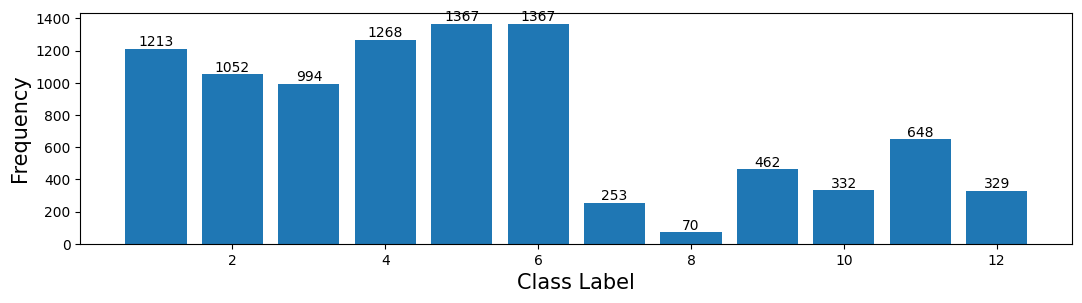

For testing data :- 
Frequencies :-  [255. 258. 211. 247. 303. 288.  51.  24.  96.  72. 135.  65.]


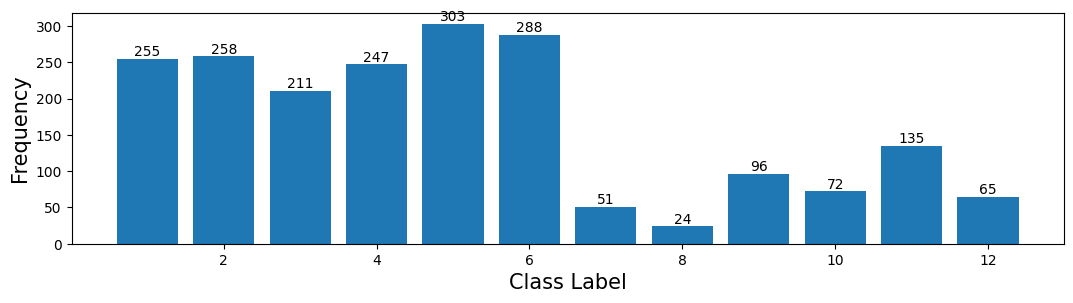

For validation data :- 
Frequencies :-  [254. 234. 202. 286. 309. 303.  71.  15.  70.  65. 128.  68.]


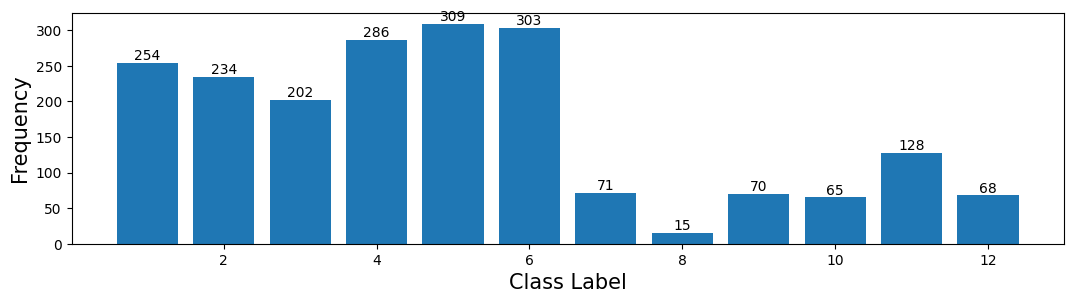

In [ ]:
print('For training data :- ')
draw_bar(ytrain)
print('For testing data :- ')
draw_bar(ytest)
print('For validation data :- ')
draw_bar(yval)

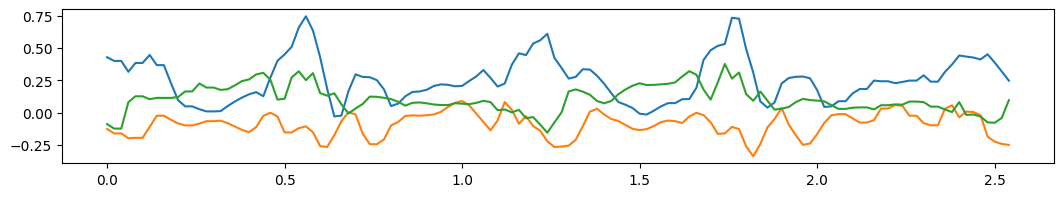

NameError: name 'label_to_class' is not defined

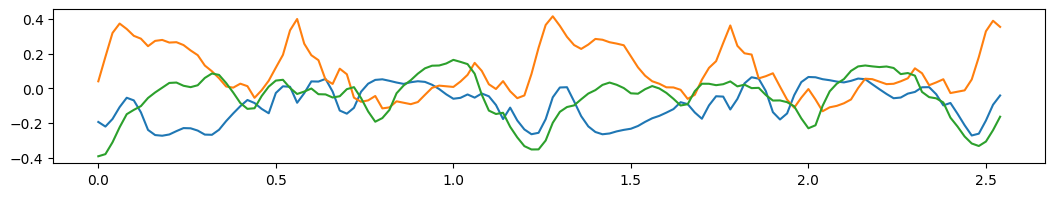

In [ ]:
for i in range(12):
    mf.draw_wave(xtrain,ytrain,i+1)    

In [ ]:
model = build_model(xtrain,ytrain)

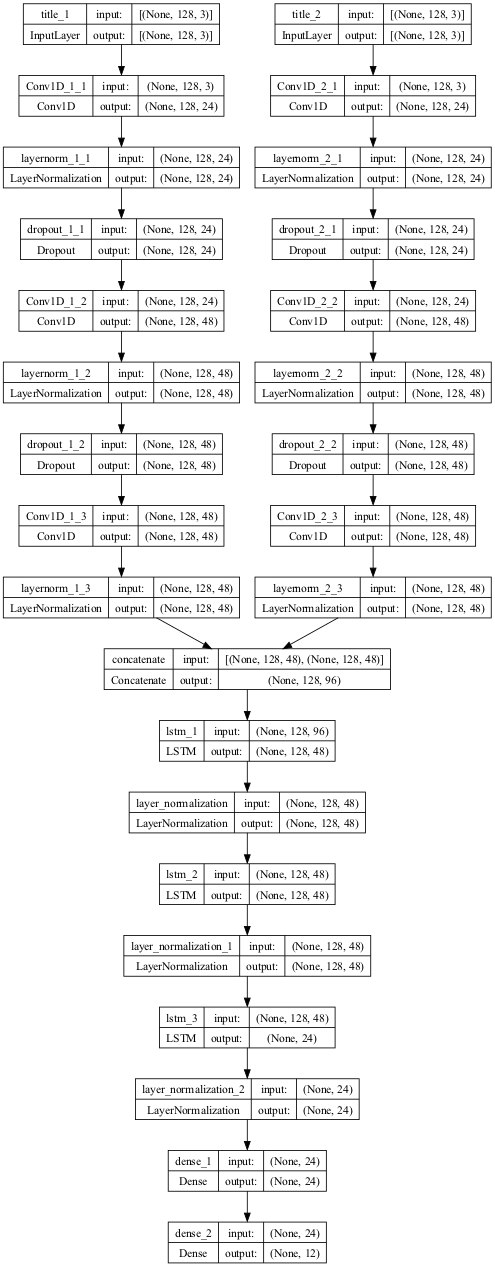

In [ ]:
# install pydot
# install graphviz

plot_model(model, "multiheaded.png",show_shapes = True,dpi=60)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title_1 (InputLayer)        [(None, 128, 3)]             0         []                            
                                                                                                  
 title_2 (InputLayer)        [(None, 128, 3)]             0         []                            
                                                                                                  
 Conv1D_1_1 (Conv1D)         (None, 128, 24)              168       ['title_1[0][0]']             
                                                                                                  
 Conv1D_2_1 (Conv1D)         (None, 128, 24)              168       ['title_2[0][0]']             
                                                                                              

In [ ]:
# These variables will be changed whenever needed

EPOCHS = 30
BATCH_SIZE = 100

In [ ]:
import time

class progress_print(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs = None):
        self.start = time.time()
        
    def on_epoch_end(self, epoch, logs=None):
        
        if epoch < 8 or (epoch+1)%10 == 0:
            print(
                'Epoch {}/{} - Time taken : {}s\nloss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}\n'
                .format(epoch+1,EPOCHS,time.time()-self.start,logs['loss'],logs['accuracy'],logs['val_loss'],logs['val_accuracy'])
            )

In [ ]:
# For 20 epochs

lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps = int((xtrain.shape[0]+BATCH_SIZE)/BATCH_SIZE),
    decay_rate = 0.99
)


model.compile(loss = 'categorical_crossentropy',optimizer=keras.optimizers.legacy.Adam(learning_rate = lr_scheduler),metrics=['accuracy'])

history1 = model.fit(
    {'title_1':xtrain[:,:,0,:],'title_2':xtrain[:,:,1,:],
    },
    {'dense_2':ytrain},
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (
        {'title_1':xval[:,:,0,:],'title_2':xval[:,:,1,:]},
        {'dense_2':yval}
    ),
    verbose = 0,
    callbacks = [progress_print()]
    #initial_epoch = 0
)



Epoch 1/30 - Time taken : 19.564411163330078s
loss: 1.3121978044509888 - accuracy: 0.5646178722381592 - val_loss: 0.8789108395576477 - val_accuracy: 0.6902742981910706

Epoch 2/30 - Time taken : 17.098775625228882s
loss: 0.6930619478225708 - accuracy: 0.75873863697052 - val_loss: 0.5799779891967773 - val_accuracy: 0.7895261645317078

Epoch 3/30 - Time taken : 17.069787979125977s
loss: 0.5159201622009277 - accuracy: 0.8133618235588074 - val_loss: 0.43308237195014954 - val_accuracy: 0.8399002552032471

Epoch 4/30 - Time taken : 16.322314977645874s
loss: 0.3901938199996948 - accuracy: 0.8467130064964294 - val_loss: 0.34077730774879456 - val_accuracy: 0.8643391728401184

Epoch 5/30 - Time taken : 15.636924982070923s
loss: 0.34894949197769165 - accuracy: 0.8605024218559265 - val_loss: 0.3144800364971161 - val_accuracy: 0.8598503470420837

Epoch 6/30 - Time taken : 16.514673948287964s
loss: 0.29292792081832886 - accuracy: 0.8801710605621338 - val_loss: 0.287706196308136 - val_accuracy: 0.871

In [ ]:
# For 50 epochs

model.compile(loss = 'categorical_crossentropy',optimizer=keras.optimizers.legacy.Adagrad(),metrics=['accuracy'])

EPOCHS += 50

history2 = model.fit(
    {'title_1':xtrain[:,:,0,:],'title_2':xtrain[:,:,1,:],
    },
    {'dense_2':ytrain},
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (
        {'title_1':xval[:,:,0,:],'title_2':xval[:,:,1,:]},
        {'dense_2':yval}
    ),
    verbose = 0,
    callbacks = [progress_print()],
    initial_epoch = EPOCHS - 50
)



Epoch 40/80 - Time taken : 16.851031064987183s
loss: 0.06891442090272903 - accuracy: 0.9733831882476807 - val_loss: 0.08824299275875092 - val_accuracy: 0.9665835499763489

Epoch 50/80 - Time taken : 16.727752923965454s
loss: 0.06583312153816223 - accuracy: 0.973703920841217 - val_loss: 0.0840662270784378 - val_accuracy: 0.9690772891044617

Epoch 60/80 - Time taken : 17.094537019729614s
loss: 0.06329988688230515 - accuracy: 0.975948691368103 - val_loss: 0.08028171956539154 - val_accuracy: 0.9720697999000549

Epoch 70/80 - Time taken : 16.807802200317383s
loss: 0.06199521943926811 - accuracy: 0.9752004146575928 - val_loss: 0.08254562318325043 - val_accuracy: 0.9695760607719421

Epoch 80/80 - Time taken : 17.369104146957397s
loss: 0.05995383858680725 - accuracy: 0.9765900373458862 - val_loss: 0.08139029890298843 - val_accuracy: 0.9700748324394226



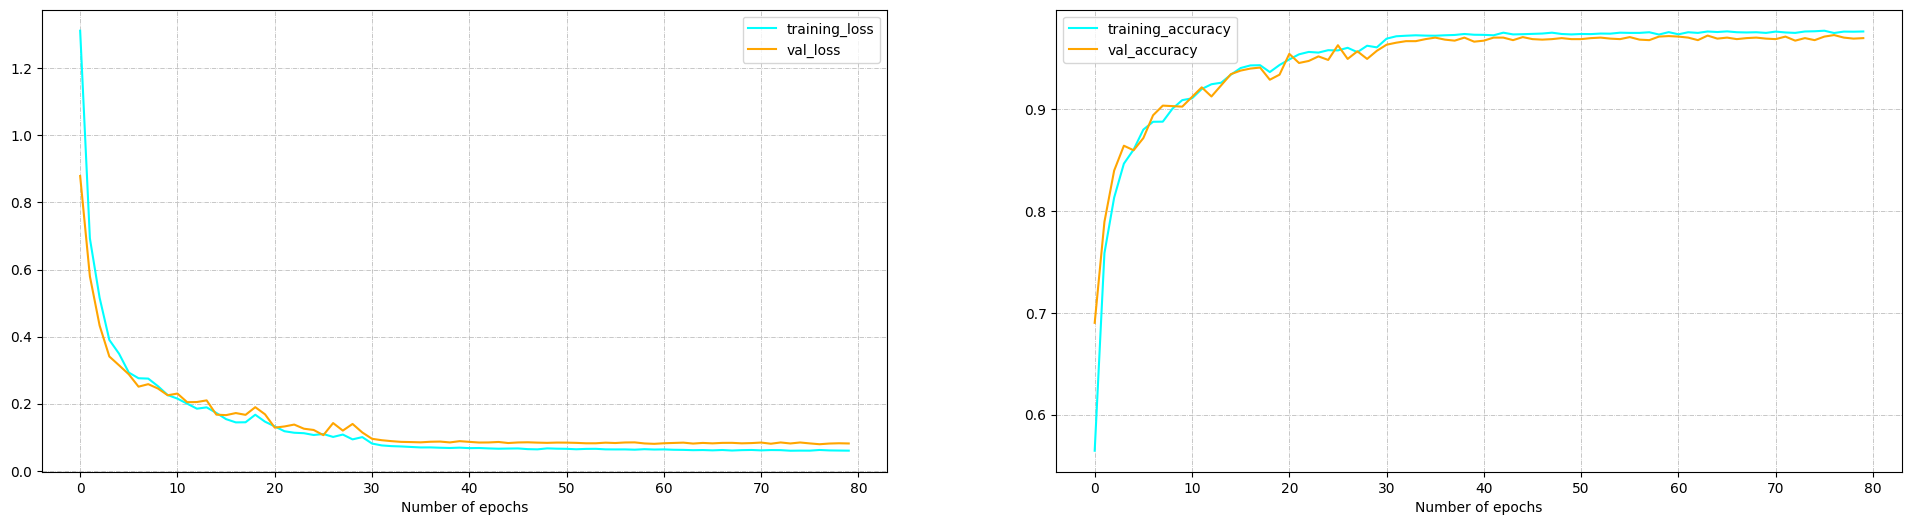

In [ ]:
plt.figure(figsize = (24,6))

# Visualizing training_loss and val_loss

plt.subplot(1,2,1)
plt.xlabel('Number of epochs')
plt.grid(True,linewidth = '0.5',linestyle = '-.')
plt.plot(history1.history['loss']+history2.history['loss'],color = 'cyan')
plt.plot(history1.history['val_loss']+history2.history['val_loss'],color = 'orange')
plt.legend(['training_loss','val_loss'])

# Visualizing training_accuracy and val_accuracy

plt.subplot(1,2,2)
plt.xlabel('Number of epochs')
plt.grid(True,linewidth = '0.5',linestyle = '-.')
plt.plot(history1.history['accuracy']+history2.history['accuracy'],color = 'cyan')
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'],color = 'orange')
plt.legend(['training_accuracy','val_accuracy'])

plt.show()

In [ ]:
model.save_weights('trained_weights.h5')
model.load_weights('trained_weights.h5')

In [ ]:
ytrain_pred = model.predict(
    {'title_1':xtrain[:,:,0,:],'title_2':xtrain[:,:,1,:],
    }
)
ytest_pred = model.predict(
    {'title_1':xtest[:,:,0,:],'title_2':xtest[:,:,1,:],
    }
)

63/63 [==============================] - 1s 19ms/step


In [ ]:
# converts softmax ydata output into 0's and 1's

ytrain_pred = to_categorical(ytrain_pred)
ytest_pred = to_categorical(ytest_pred)

In [ ]:
train_cm = confusion_matrix(ytrain.argmax(axis = 1),ytrain_pred.argmax(axis = 1))
test_cm = confusion_matrix(ytest.argmax(axis = 1),ytest_pred.argmax(axis = 1))

<Axes: >

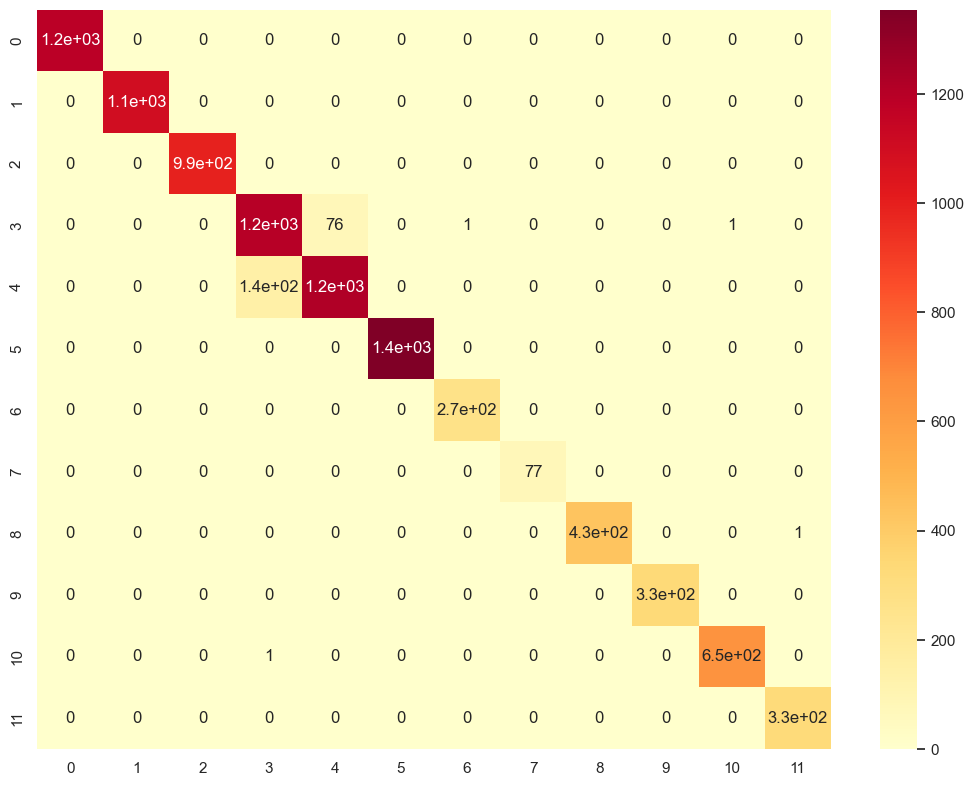

In [ ]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(train_cm,annot = True,cmap = 'YlOrRd')

<Axes: >

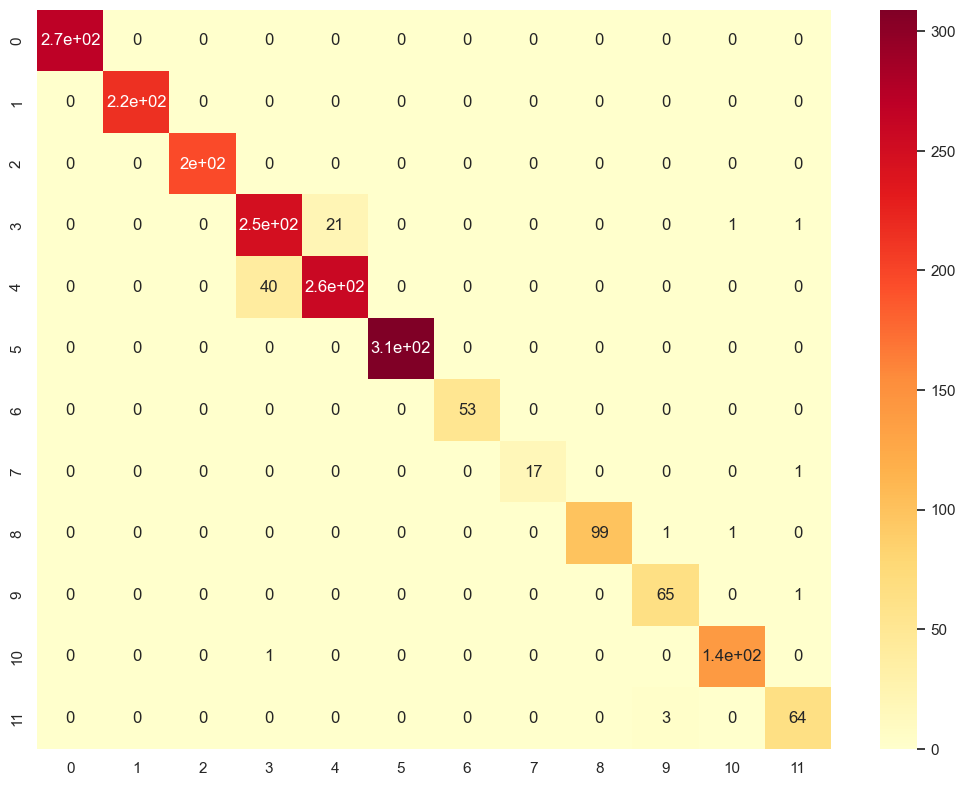

In [ ]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [ ]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ytest_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       215
           2       1.00      1.00      1.00       196
           3       0.86      0.92      0.89       271
           4       0.92      0.87      0.89       298
           5       1.00      1.00      1.00       309
           6       1.00      1.00      1.00        53
           7       1.00      0.94      0.97        18
           8       1.00      0.98      0.99       101
           9       0.94      0.98      0.96        66
          10       0.99      0.99      0.99       142
          11       0.96      0.96      0.96        67

    accuracy                           0.96      2005
   macro avg       0.97      0.97      0.97      2005
weighted avg       0.97      0.96      0.96      2005



In [ ]:
model.save('saved_model/model')

INFO:tensorflow:Assets written to: saved_model/model/assets


INFO:tensorflow:Assets written to: saved_model/model/assets


In [ ]:
with open('saved_model/scaler','wb') as f:
    pickle.dump(scaler,f)